Steps needed to run this script: 
1. Make sure Anaconda, git, and VScode are installed
    a. Follow steps on MMpose website (https://mmpose.readthedocs.io/en/latest/installation.html)
2. create a python enviornemnt with python == 3.8
3. install pytorch 1.13.1 and cuda 11.7 
    a. https://pytorch.org/get-started/previous-versions/
    b. pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117
4. git clone openmim
5. mim install mmcv == 2.2.0
6. mim install mmengine
7. git clone mmpose
8. mim install mmpose == 1.3.1

The versions are specific to running mmpose, as of 7/30/2025 these are the working versions 

In [ ]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import butter, filtfilt

In [ ]:
# Set current directory to conda enviornment
%cd "C:\Users\grant\miniconda3\envs\PoseEst"

# Inferencer_demo expects strings as inputs, variables are set here (string1 = input)
# Run mmpose inferencer demo to create video and keypoint data 
# Make sure to convert video to MP4 or the visualization will not work, keypoints will map but visualiation must be on an MP4 file
%run "C:\\Users\\grant\\mmpose\\demo\\inferencer_demo.py" "C:\\Users\\grant\\Desktop\\VD_ATD Testing\\Front\\GH011248.mp4" --pose3d human3d --vis-out-dir "C:\Users\grant\Desktop\PoseEstimation\visualizations" --pred-out-dir "C:\Users\grant\Desktop\PoseEstimation\visualizations"

In [ ]:
#seperates keypoint specific data from the meta data and creates a dictionary for calling later
f = open("C:\\Users\\grant\\Desktop\\PoseEstimation\\visualizations\\GX011229.json")
data_output = json.load(f)
output_dict = {}
for jdx in range(len(data_output)):
    for idx, item in enumerate(data_output[jdx]['instances']):
        output_dict[f'item_{jdx}'] = item

with open('output_dict.json', 'w') as f_out:
    json.dump(dict(output_dict), f_out, indent=2)

#meta_dict = data_output['meta_info']        

In [4]:
meta_dict = {"meta_info": {
		"dataset_name": "h36m",
		"num_keypoints": 17,
		"keypoint_id2name": {
			"0": "root",
			"1": "right_hip",
			"2": "right_knee",
			"3": "right_foot",
			"4": "left_hip",
			"5": "left_knee",
			"6": "left_foot",
			"7": "spine",
			"8": "thorax",
			"9": "neck_base",
			"10": "head",
			"11": "left_shoulder",
			"12": "left_elbow",
			"13": "left_wrist",
			"14": "right_shoulder",
			"15": "right_elbow",
			"16": "right_wrist"
		},
		"keypoint_name2id": {
			"root": 0,
			"right_hip": 1,
			"right_knee": 2,
			"right_foot": 3,
			"left_hip": 4,
			"left_knee": 5,
			"left_foot": 6,
			"spine": 7,
			"thorax": 8,
			"neck_base": 9,
			"head": 10,
			"left_shoulder": 11,
			"left_elbow": 12,
			"left_wrist": 13,
			"right_shoulder": 14,
			"right_elbow": 15,
			"right_wrist": 16
		},
		"upper_body_ids": [
			7,
			8,
			9,
			10,
			11,
			12,
			13,
			14,
			15,
			16
		],
		"lower_body_ids": [
			0,
			1,
			2,
			3,
			4,
			5,
			6
		],
		"flip_indices": [
			0,
			4,
			5,
			6,
			1,
			2,
			3,
			7,
			8,
			9,
			10,
			14,
			15,
			16,
			11,
			12,
			13
		],
		"flip_pairs": [
			[
				4,
				1
			],
			[
				5,
				2
			],
			[
				6,
				3
			],
			[
				1,
				4
			],
			[
				2,
				5
			],
			[
				3,
				6
			],
			[
				14,
				11
			],
			[
				15,
				12
			],
			[
				16,
				13
			],
			[
				11,
				14
			],
			[
				12,
				15
			],
			[
				13,
				16
			]
		],
		"keypoint_colors": {
			"__ndarray__": [
				[
					51,
					153,
					255
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					51,
					153,
					255
				],
				[
					51,
					153,
					255
				],
				[
					51,
					153,
					255
				],
				[
					51,
					153,
					255
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				]
			],
			"dtype": "uint8",
			"shape": [
				17,
				3
			],
			"Corder": "true"
		},
		"num_skeleton_links": 16,
		"skeleton_links": [
			[
				0,
				4
			],
			[
				4,
				5
			],
			[
				5,
				6
			],
			[
				0,
				1
			],
			[
				1,
				2
			],
			[
				2,
				3
			],
			[
				0,
				7
			],
			[
				7,
				8
			],
			[
				8,
				9
			],
			[
				9,
				10
			],
			[
				8,
				11
			],
			[
				11,
				12
			],
			[
				12,
				13
			],
			[
				8,
				14
			],
			[
				14,
				15
			],
			[
				15,
				16
			]
		],
		"skeleton_link_colors": {
			"__ndarray__": [
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				],
				[
					51,
					153,
					255
				],
				[
					51,
					153,
					255
				],
				[
					51,
					153,
					255
				],
				[
					51,
					153,
					255
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					0,
					255,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				],
				[
					255,
					128,
					0
				]
			],
			"dtype": "uint8",
			"shape": [
				16,
				3
			],
			"Corder": "true"
		},
		"dataset_keypoint_weights": {
			"__ndarray__": [
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0,
				1.0
			],
			"dtype": "float32",
			"shape": [
				17
			]
		},
		"sigmas": {
			"__ndarray__": [],
			"dtype": "float32",
			"shape": [
				0
			]
		},
		"stats_info": {
			"bbox_center": {
				"__ndarray__": [
					528.0,
					427.0
				],
				"dtype": "float32",
				"shape": [
					2
				]
			},
			"bbox_scale": {
				"__ndarray__": 400.0,
				"dtype": "float32",
				"shape": []
			}
		}
	}
}

In [ ]:
#creates a dictionary for all the markerset metadata
meta_dict = meta_dict['meta_info']

In [ ]:
#splits the data into separate keypoints for each frame
keypoints_split = {}
for jdx in range(len(output_dict)):
    for idx, item in enumerate(output_dict[f'item_{jdx}']['keypoints']):
        keypoints_split[f'item_{jdx}_{idx}'] = item

with open('output_dict.json', 'w') as f_out:
    json.dump(keypoints_split, f_out, indent=2)    

In [ ]:
#Creates a dataframe that labels the split data by keypoint name for each frame 
keypoints_df = pd.DataFrame.from_dict(keypoints_split, orient='index')
names_df = pd.DataFrame.from_dict(meta_dict['keypoint_id2name'], orient='index')

index = []
for idx in range(len(output_dict)):
    for jdx in range(len(names_df)):
        label = f'frame_{idx}_' + meta_dict['keypoint_id2name'][str(jdx)]
        index.append(label)

keypoints_df.index = index        

In [ ]:
# Pull keypoint specific data and convert meters to inches

head = keypoints_df[keypoints_df.index.str.contains("head")]*39.37
neck = keypoints_df[keypoints_df.index.str.contains("neck")]*39.37
root = keypoints_df[keypoints_df.index.str.contains("root")]*39.37
left_shoulder = keypoints_df[keypoints_df.index.str.contains("left_shoulder")]*39.37
right_shoulder = keypoints_df[keypoints_df.index.str.contains("right_shoulder")]*39.37
spine = keypoints_df[keypoints_df.index.str.contains("spine")]*39.37
thorax = keypoints_df[keypoints_df.index.str.contains("thorax")]*39.37

In [352]:
def lowpass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5*fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

In [ ]:
# Filters the marker data to create smoother trajectories for matching with string pots
# cutoff frequency is 60 Hz for Left and Front views, 240 Hz for ISO (Update based on camera settings used in test)

head0 = lowpass_filter(head[0], 4, 240) 
head1 = lowpass_filter(head[1], 4, 240)
head2 = lowpass_filter(head[2], 4, 240)
neck0 = lowpass_filter(neck[0], 4, 240)
neck1 = lowpass_filter(neck[1], 4, 240)
neck2 = lowpass_filter(neck[2], 4, 240)
spine0 = lowpass_filter(spine[0], 4, 240)
spine1 = lowpass_filter(spine[1], 4, 240)
spine2 = lowpass_filter(spine[2], 4, 240)

# created a time vector for plotting
time = np.linspace(0, len(spine2)/240, len(spine2))

D:\


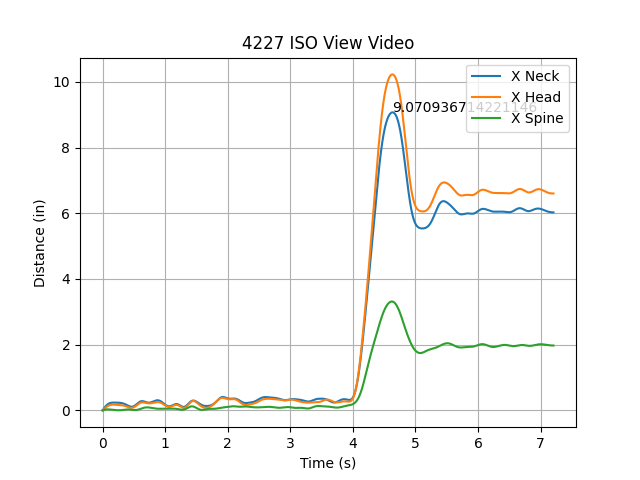

In [ ]:
# This sets the save location for the figures, and plots the neck, head, and spine for that view
%cd "D:\"
plt.figure()
plt.title(label="4227 ISO View Video")
plt.xlabel("Time (s)")
plt.ylabel("Distance (in)")
plt.plot(time, abs(neck0 - max(neck0)), label="X Neck")
plt.plot(time, abs(head0 - max(head0)), label= "X Head")
plt.plot( time, abs(spine0 - max(spine0)), label = "X Spine")
plt.legend()
plt.grid()
plt.savefig('GX011229_4227ISOView.png')
plt.show()
